In [1]:
# Run this cell to configure Tensorflow to use your GPU
import tensorflow as tf
for gpu in tf.config.experimental.list_physical_devices('GPU'):
    print(gpu)
    tf.config.experimental.set_memory_growth(gpu, True)

In [3]:
# See https://keras.io/applications for details
from tensorflow.keras.applications.vgg16 import VGG16, decode_predictions, preprocess_input
model = VGG16()

# Other models to try:
# from tensorflow.keras.applications.vgg19 import VGG19, decode_predictions, preprocess_input
# from tensorflow.keras.applications.resnet50 import ResNet50, decode_predictions, preprocess_input
# from tensorflow.keras.applications.densenet import DenseNet121, decode_predictions, preprocess_input
# from tensorflow.keras.applications.densenet import DenseNet169, decode_predictions, preprocess_input
# from tensorflow.keras.applications.densenet import DenseNet201, decode_predictions, preprocess_input

2022-09-18 01:55:49.049915: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-09-18 01:55:49.113506: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


553476096/553467096 [==============================] - 25s 0us/step


In [4]:
model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [5]:
# Uncomments to look at the model's weights. It's a list of very large tensors!
# model.weights

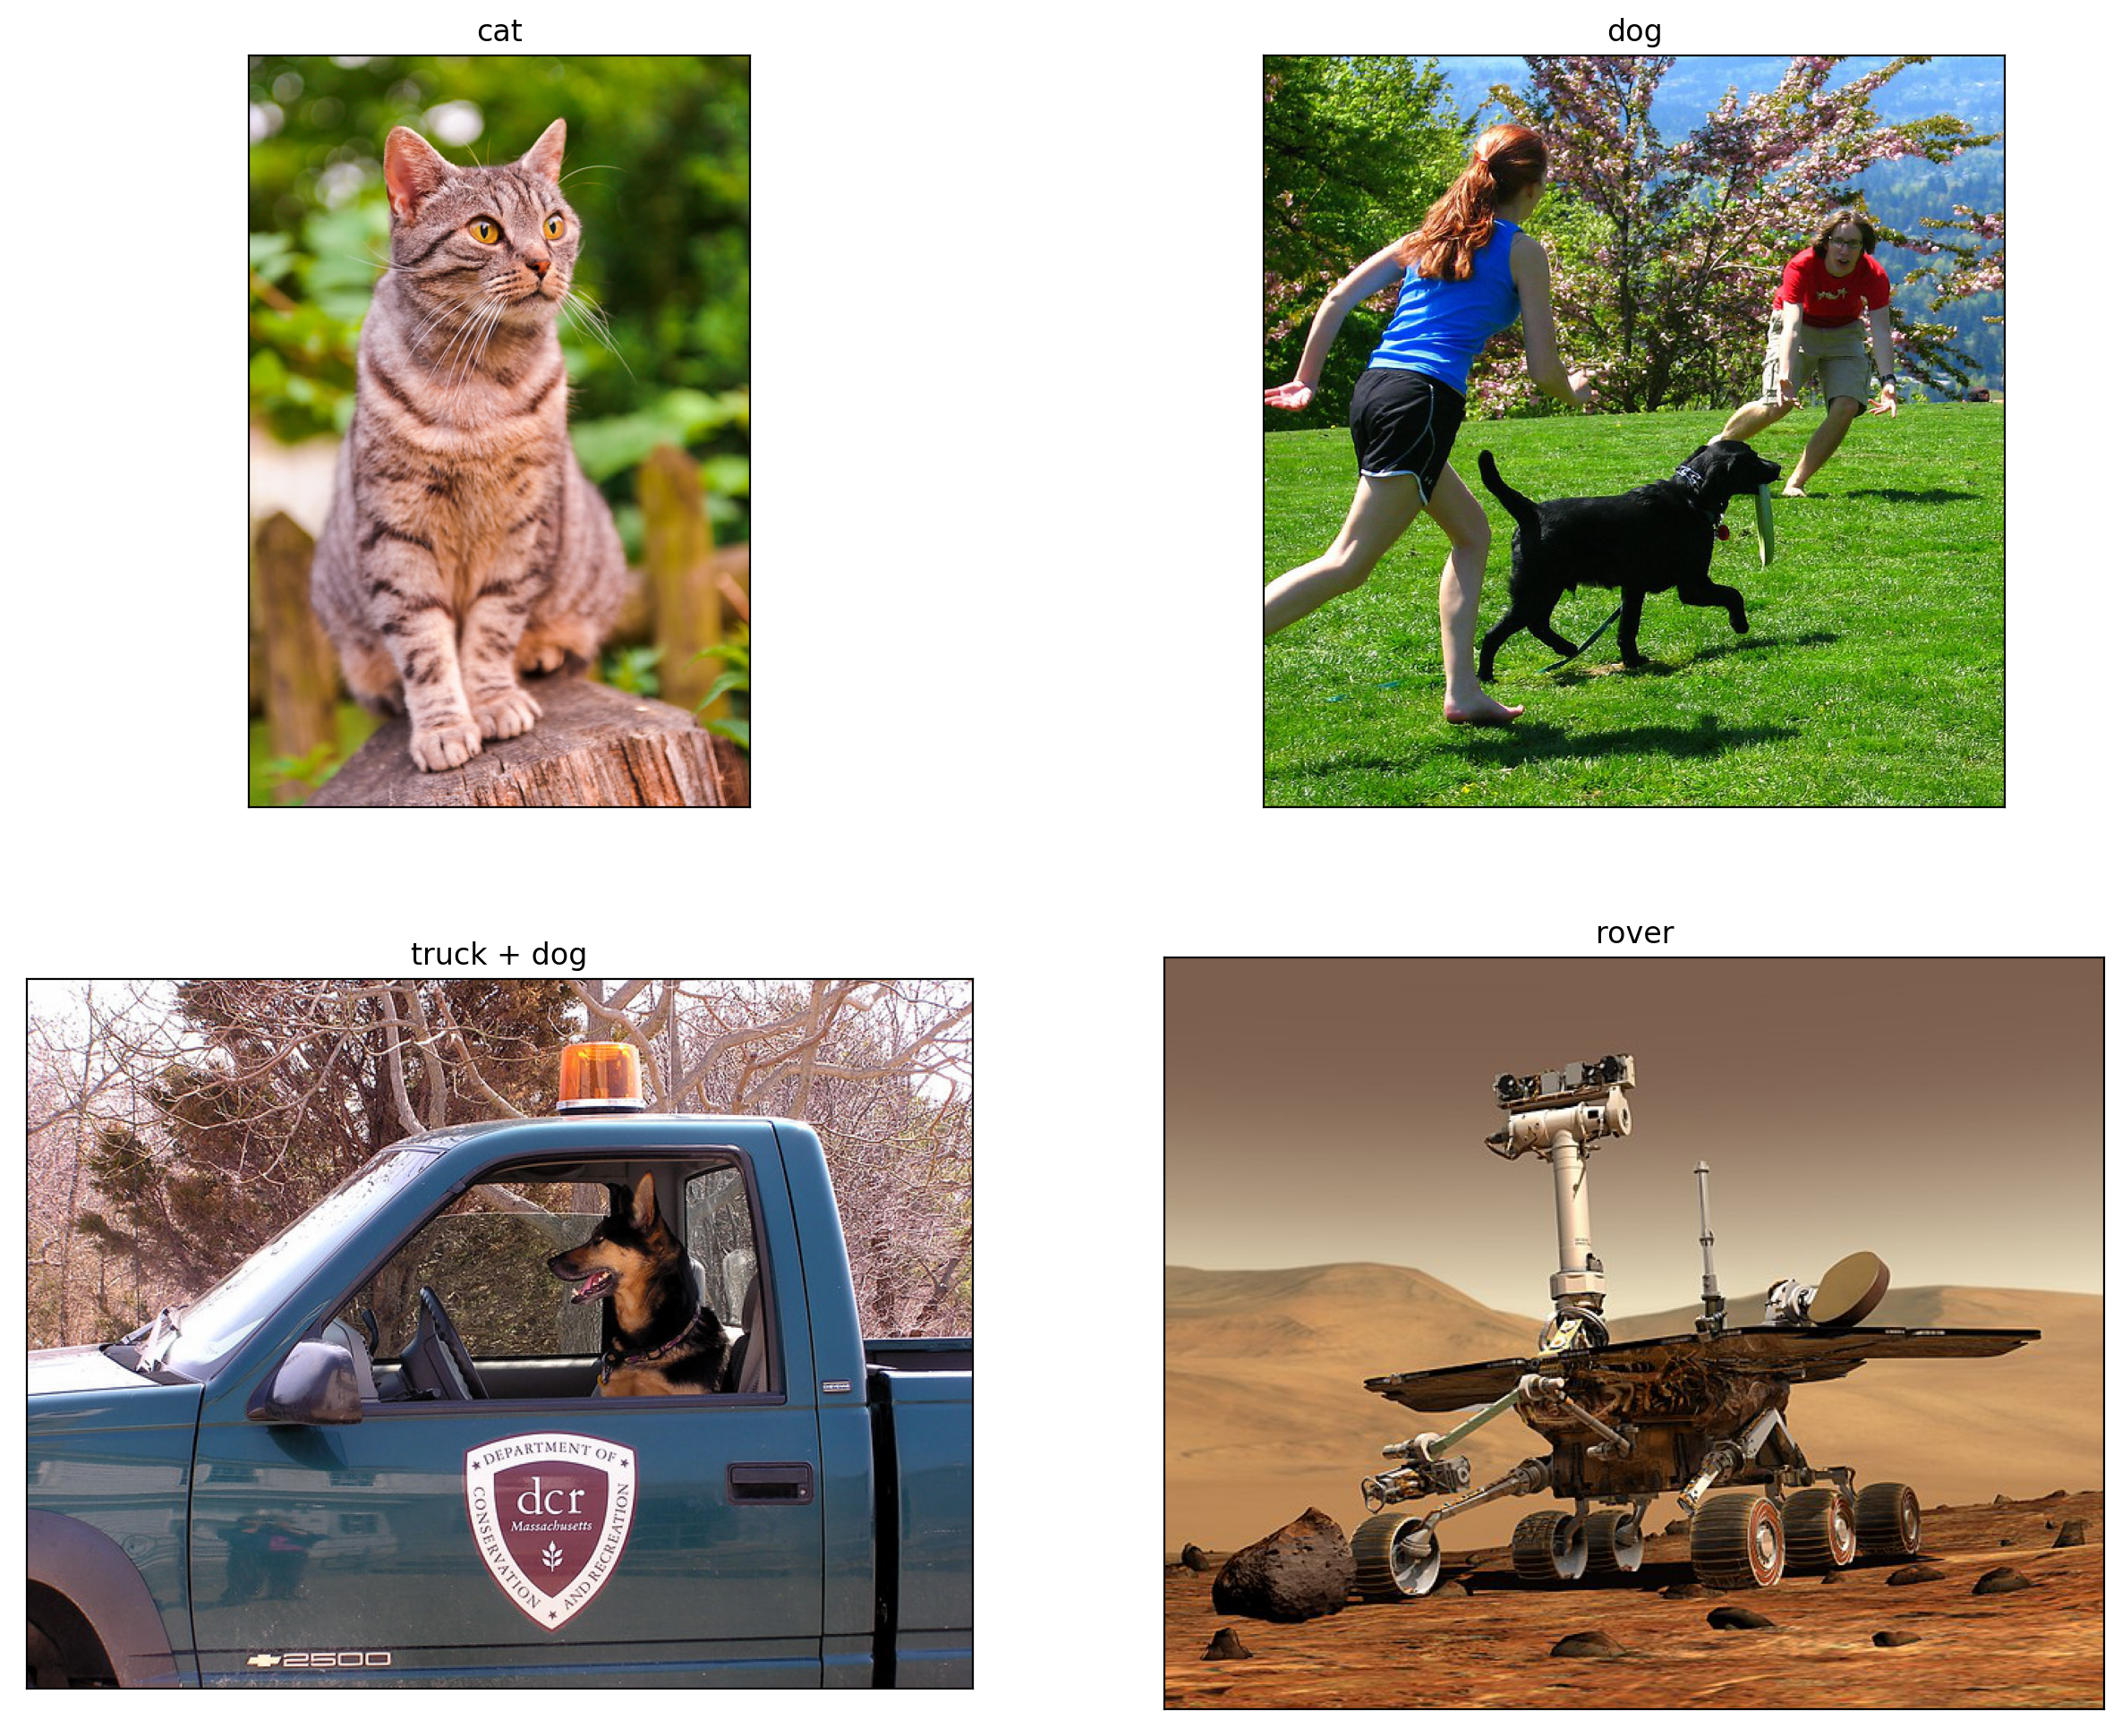

In [6]:
from utils.plot import *

# Loads a tiny batch of images from Internet
images_raw = load_tiny_batch()
plot_images_grid(images_raw)

In [7]:
import numpy as np

# Cropped and/or resized into ImageNet shape 224x224x3 array of type uint8 [0, 255]
images_resized = np.array([crop_and_resize_for_imagenet(i) for i in images_raw.values()])

# Rescaled RGB distribution to match ImageNet
images_rescaled = preprocess_input(images_resized)

In [8]:
images_rescaled.shape

(4, 224, 224, 3)

In [ ]:
import pandas as pd

# Returns shape (?, 1000) array of floats
predictions_raw = model.predict(images_rescaled)

# Fetch list of top-5 likelihood labels
decoded_top5 = decode_predictions(predictions_raw, top=5)

report_by_name = {
    name: pd.DataFrame(
        prediction, 
        columns=['class ID', 'class label', 'probability']
    )
    for name, prediction in zip(images_raw.keys(), decoded_top5)
}

2022-09-18 01:57:08.772527: W tensorflow/core/platform/profile_utils/cpu_utils.cc:118] Failed to find bogomips or clock in /proc/cpuinfo; cannot determine CPU frequency


In [ ]:
# Displays the model's predicted classes.

plot_image(images_raw['cat'])
report_by_name['cat']

In [ ]:
# People were not one of the classes in ImageNet 1K

plot_image(images_raw['dog'])
report_by_name['dog']

In [ ]:
# The model was not able to find the dog, only the truck.

plot_image(images_raw['truck + dog'])
report_by_name['truck + dog']

In [ ]:
# Rovers are definitely not one of the 1K classes in ImageNet.
# It is insightful to see what the models thinks the rover looks like, though.

plot_image(images_raw['rover'])
report_by_name['rover']